# 生成数据
## 介绍
这个文档，会利用pandas生成基于时间序列的csv文件，用于测试

- gap_min: 多少分钟统计一次信息
- points_day：一整天，采集多少个点
- floors：有多少个楼层
- days：多少天的数据

numpy size
行：points_day--1440
列：floors--20
days--30
[30,20,1440]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gap_min=1
points_day=int(60/gap_min*24)
deviation_person=30*gap_min
floors=10
days=60

In [3]:
#生成正整数的正太分布
#+/-一个deviation是68%
#+/-两个deviation是96%

data = np.zeros((days,floors,points_day),dtype=np.int8)
data.shape
print('total days:',days)

def generate_norm(time,deviation):
    distribution_one=(np.random.standard_normal(days)*deviation+time).astype(np.int16)
    distribution_one[distribution_one<0]=0
    distribution_one[distribution_one>=points_day]=points_day-1
    return distribution_one


class Person():
    def __init__(self,floor=0,**kw):
        global data
        self.floor=floor
        self.schedule=kw
        data = self.makeLandingCall(data)
       
    
    def makeLandingCall(self,data):    
        for time,deviation in self.schedule.items():
            temp = generate_norm(int(time),deviation)
#             print('floor {}: make call in recent days:{}'.format(self.floor,temp))
            for day,time in enumerate(temp):
                data[day,self.floor,time] = 1
        return data

class Group():
    def __init__(self,group_size,floor):
        for i in range(group_size):
#             time=np.random.choice([i for i in range(24)],size=1,p=p)[0]
#             deviation=np.random.choice([1,2,3,4],size=1,p=[0.5,0.3,0.1,0.1])[0]
            time=np.random.randint(points_day)
            deviation=np.random.randint(deviation_person)
            person_temp=Person(floor=floor,**{str(time):deviation})
            del person_temp
            
f1=Group(group_size=10,floor=1)
f2=Group(group_size=10,floor=2)
f3=Group(group_size=10,floor=3)
f4=Group(group_size=120,floor=4)
andrew=Person(floor=2,**{'480':2})
data.shape

total days: 60


(60, 10, 1440)

In [4]:
import matplotlib.pyplot as plt

def analyze(d=0,f=2,t=8*60):
    plt.rcParams['figure.figsize'] = (8.0, 6.0) # 设置figure_size尺寸
    plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
    plt.rcParams['savefig.dpi'] = 300 #图片像素
    plt.rcParams['figure.dpi'] = 300 #分辨率
    ################################
    plt.subplot(2,2,1)
    plt.tight_layout()

    index=np.where(data[d,f,:]==1)
    plt.hist(index,bins=24)
    plt.xlabel('hours')# make axis labels
    plt.xticks([x*60 for x in range(24)],[x for x in range(24)],rotation=-90)
    plt.ylabel('landing-call counts')
    plt.legend(['day:{} floor:{}'.format(d,f)])
    plt.title('landing-call in One-day')# give plot a title
    plt.grid()

    ####################################
    plt.subplot(2,2,2)
    plt.tight_layout()
    index_added=[]
    for d in range(days):
        index=np.array(np.where(data[d,f,:]==1)).reshape(-1)
        index_added=np.concatenate((index_added,index))
    plt.hist(index_added,bins=240, facecolor='blue', alpha=0.7)
    plt.xlabel('Time-period')# make axis labels
    plt.xticks([x*60 for x in range(24)],[x for x in range(24)],rotation=-90)
    plt.ylabel('landing-call counts')
    plt.legend(['floor:{}'.format(f)])
    plt.title('landing-call statistic in 30days')# give plot a title
    plt.grid()

    ################################
    plt.subplot(2,2,3)
    plt.tight_layout()
    index_added=[]
    for d in range(days):
        index=np.array(np.where(data[d,f,:]==1)).reshape(-1)
        index_added=np.concatenate((index_added,index))
    index_added=np.delete(index_added,np.where(index_added<(t-30)))
    index_added=np.delete(index_added,np.where(index_added>(t+30)))

    plt.hist(index_added,bins=60, facecolor='red', alpha=0.5)
    plt.xlabel('Time-period')# make axis labels
    plt.xticks([t-30,t-20,t-10,t,t+10,t+20,t+30],['7:30','7:40','7:50','8:00','8:10','8:20','8:30'],rotation=45)
    plt.ylabel('landing-call counts')
    plt.legend(['floor:{}'.format(f)])
    plt.title('landing-call statistic at 8am in 30days')# give plot a title
    plt.grid()


    plt.show()

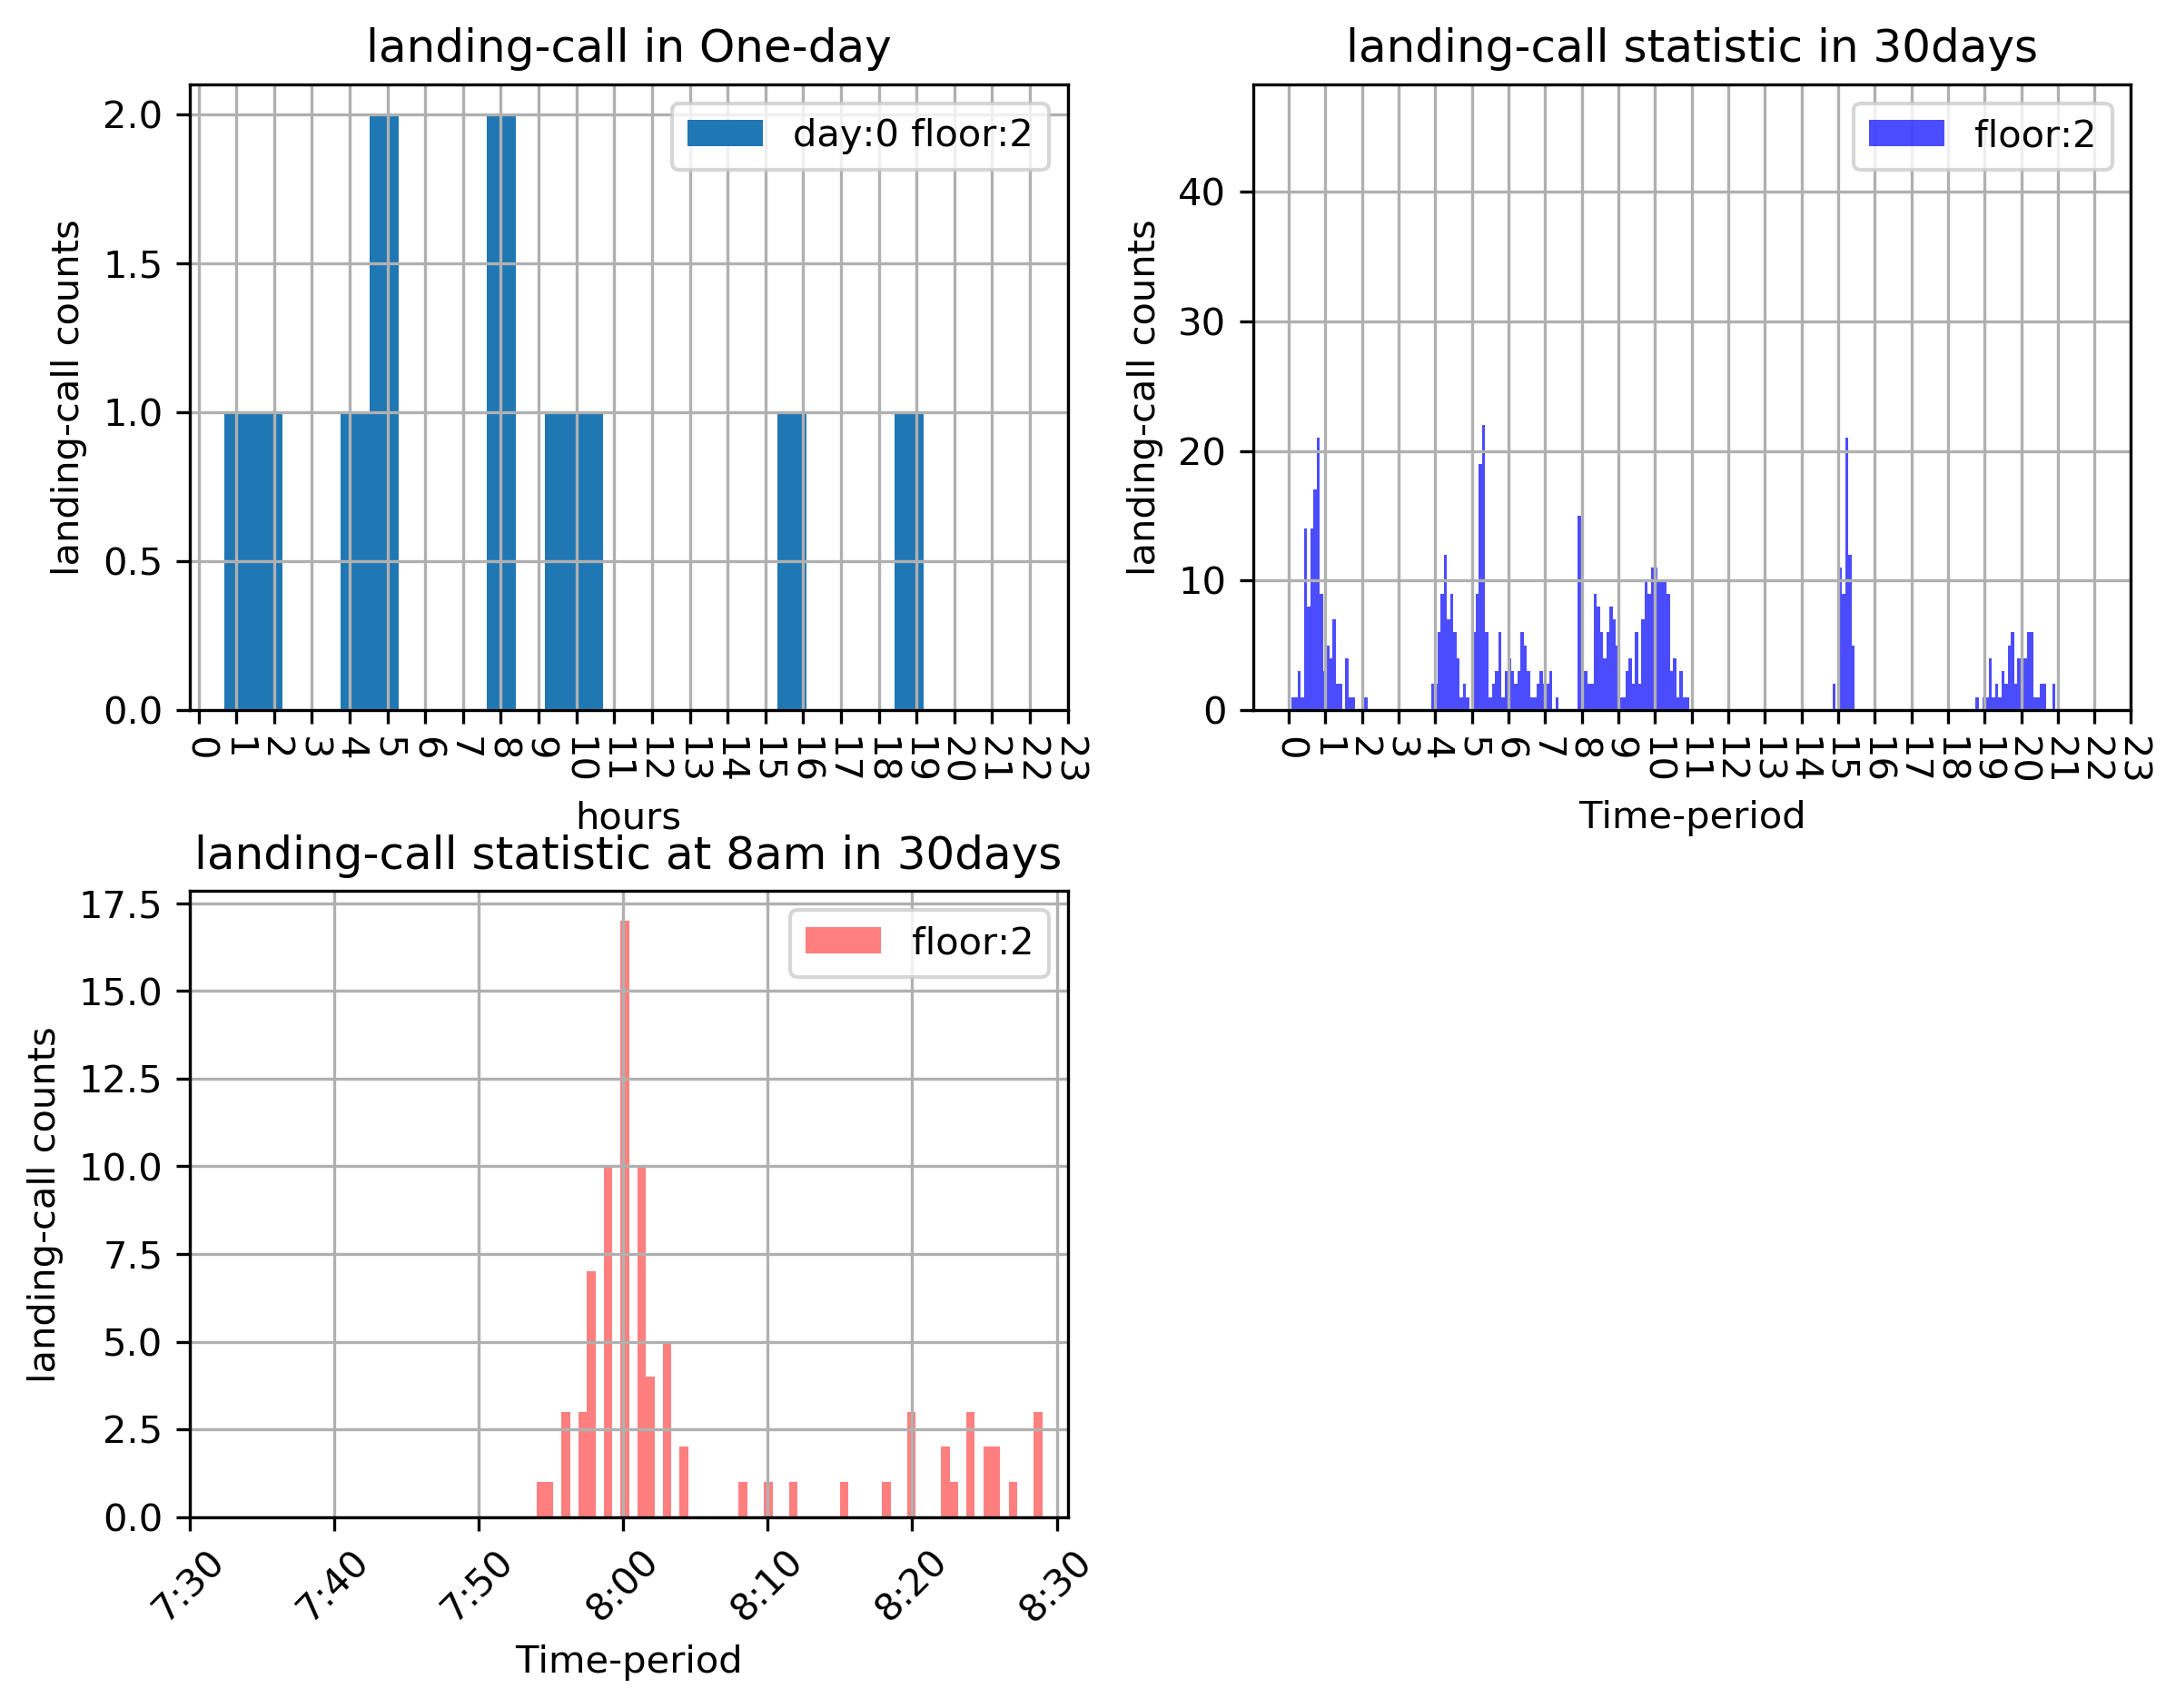

In [5]:
analyze(d=0,f=2,t=8*60)

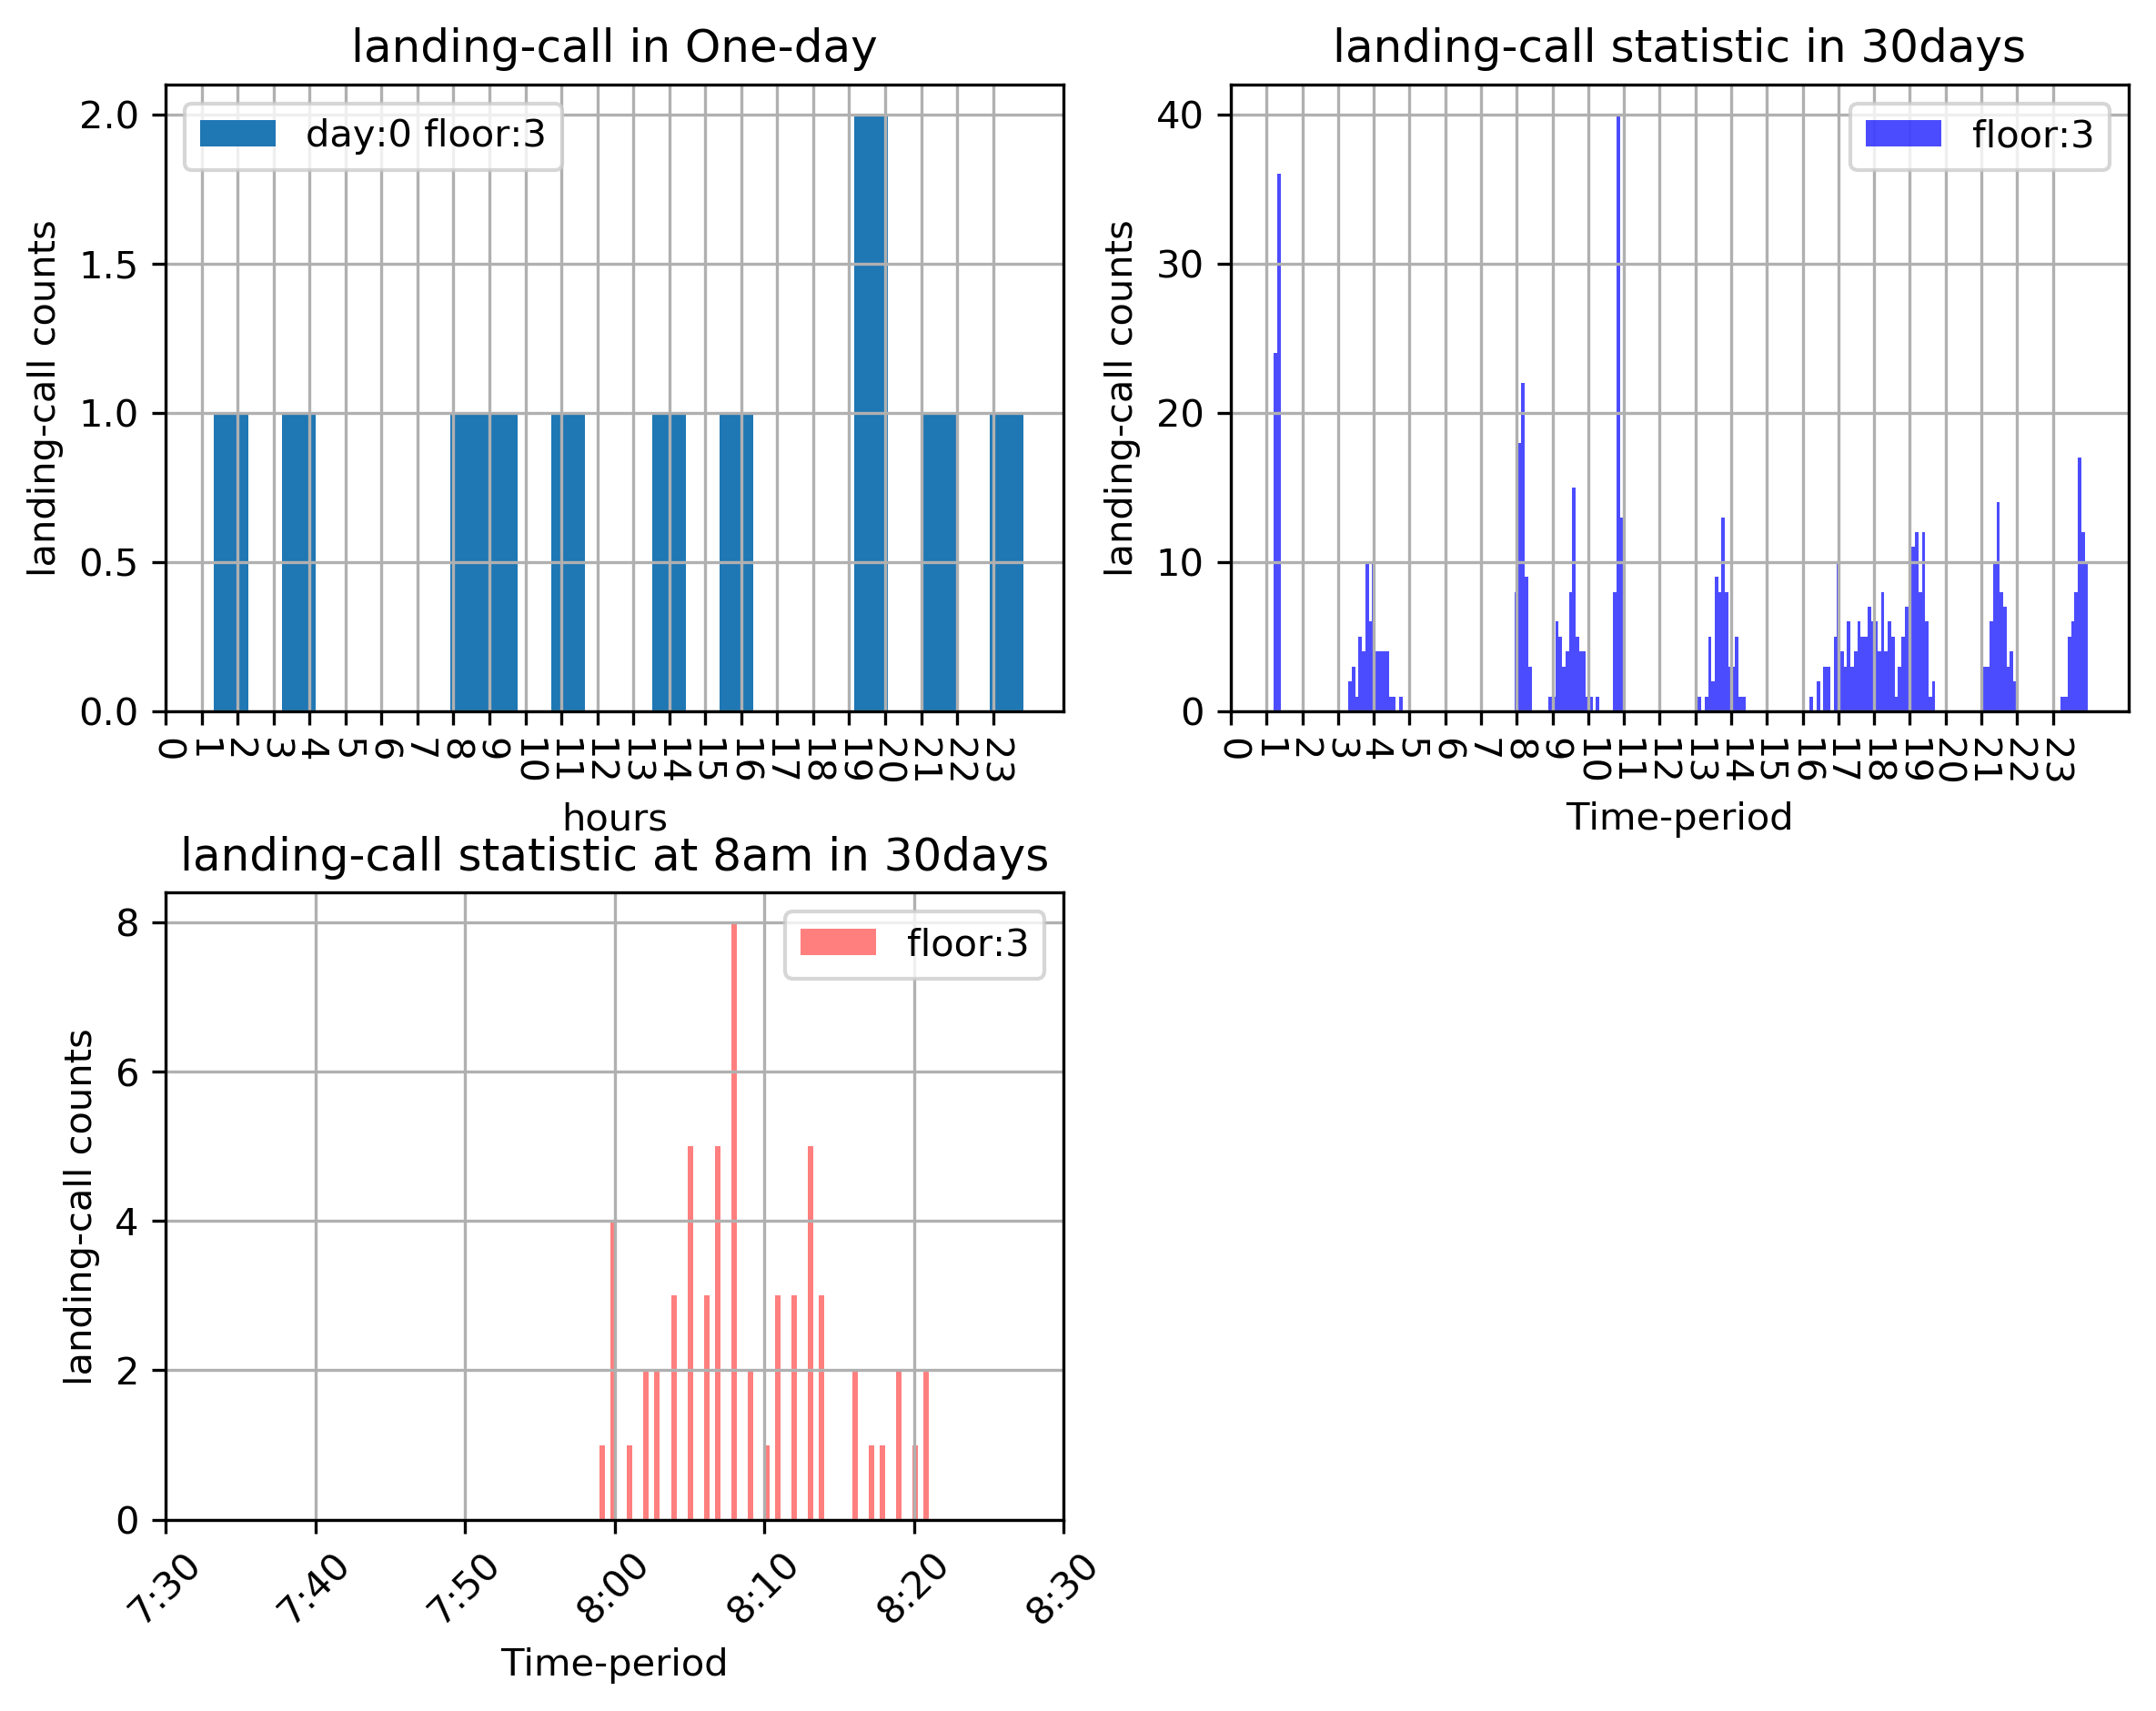

In [8]:
analyze(d=0,f=3,t=8*60)

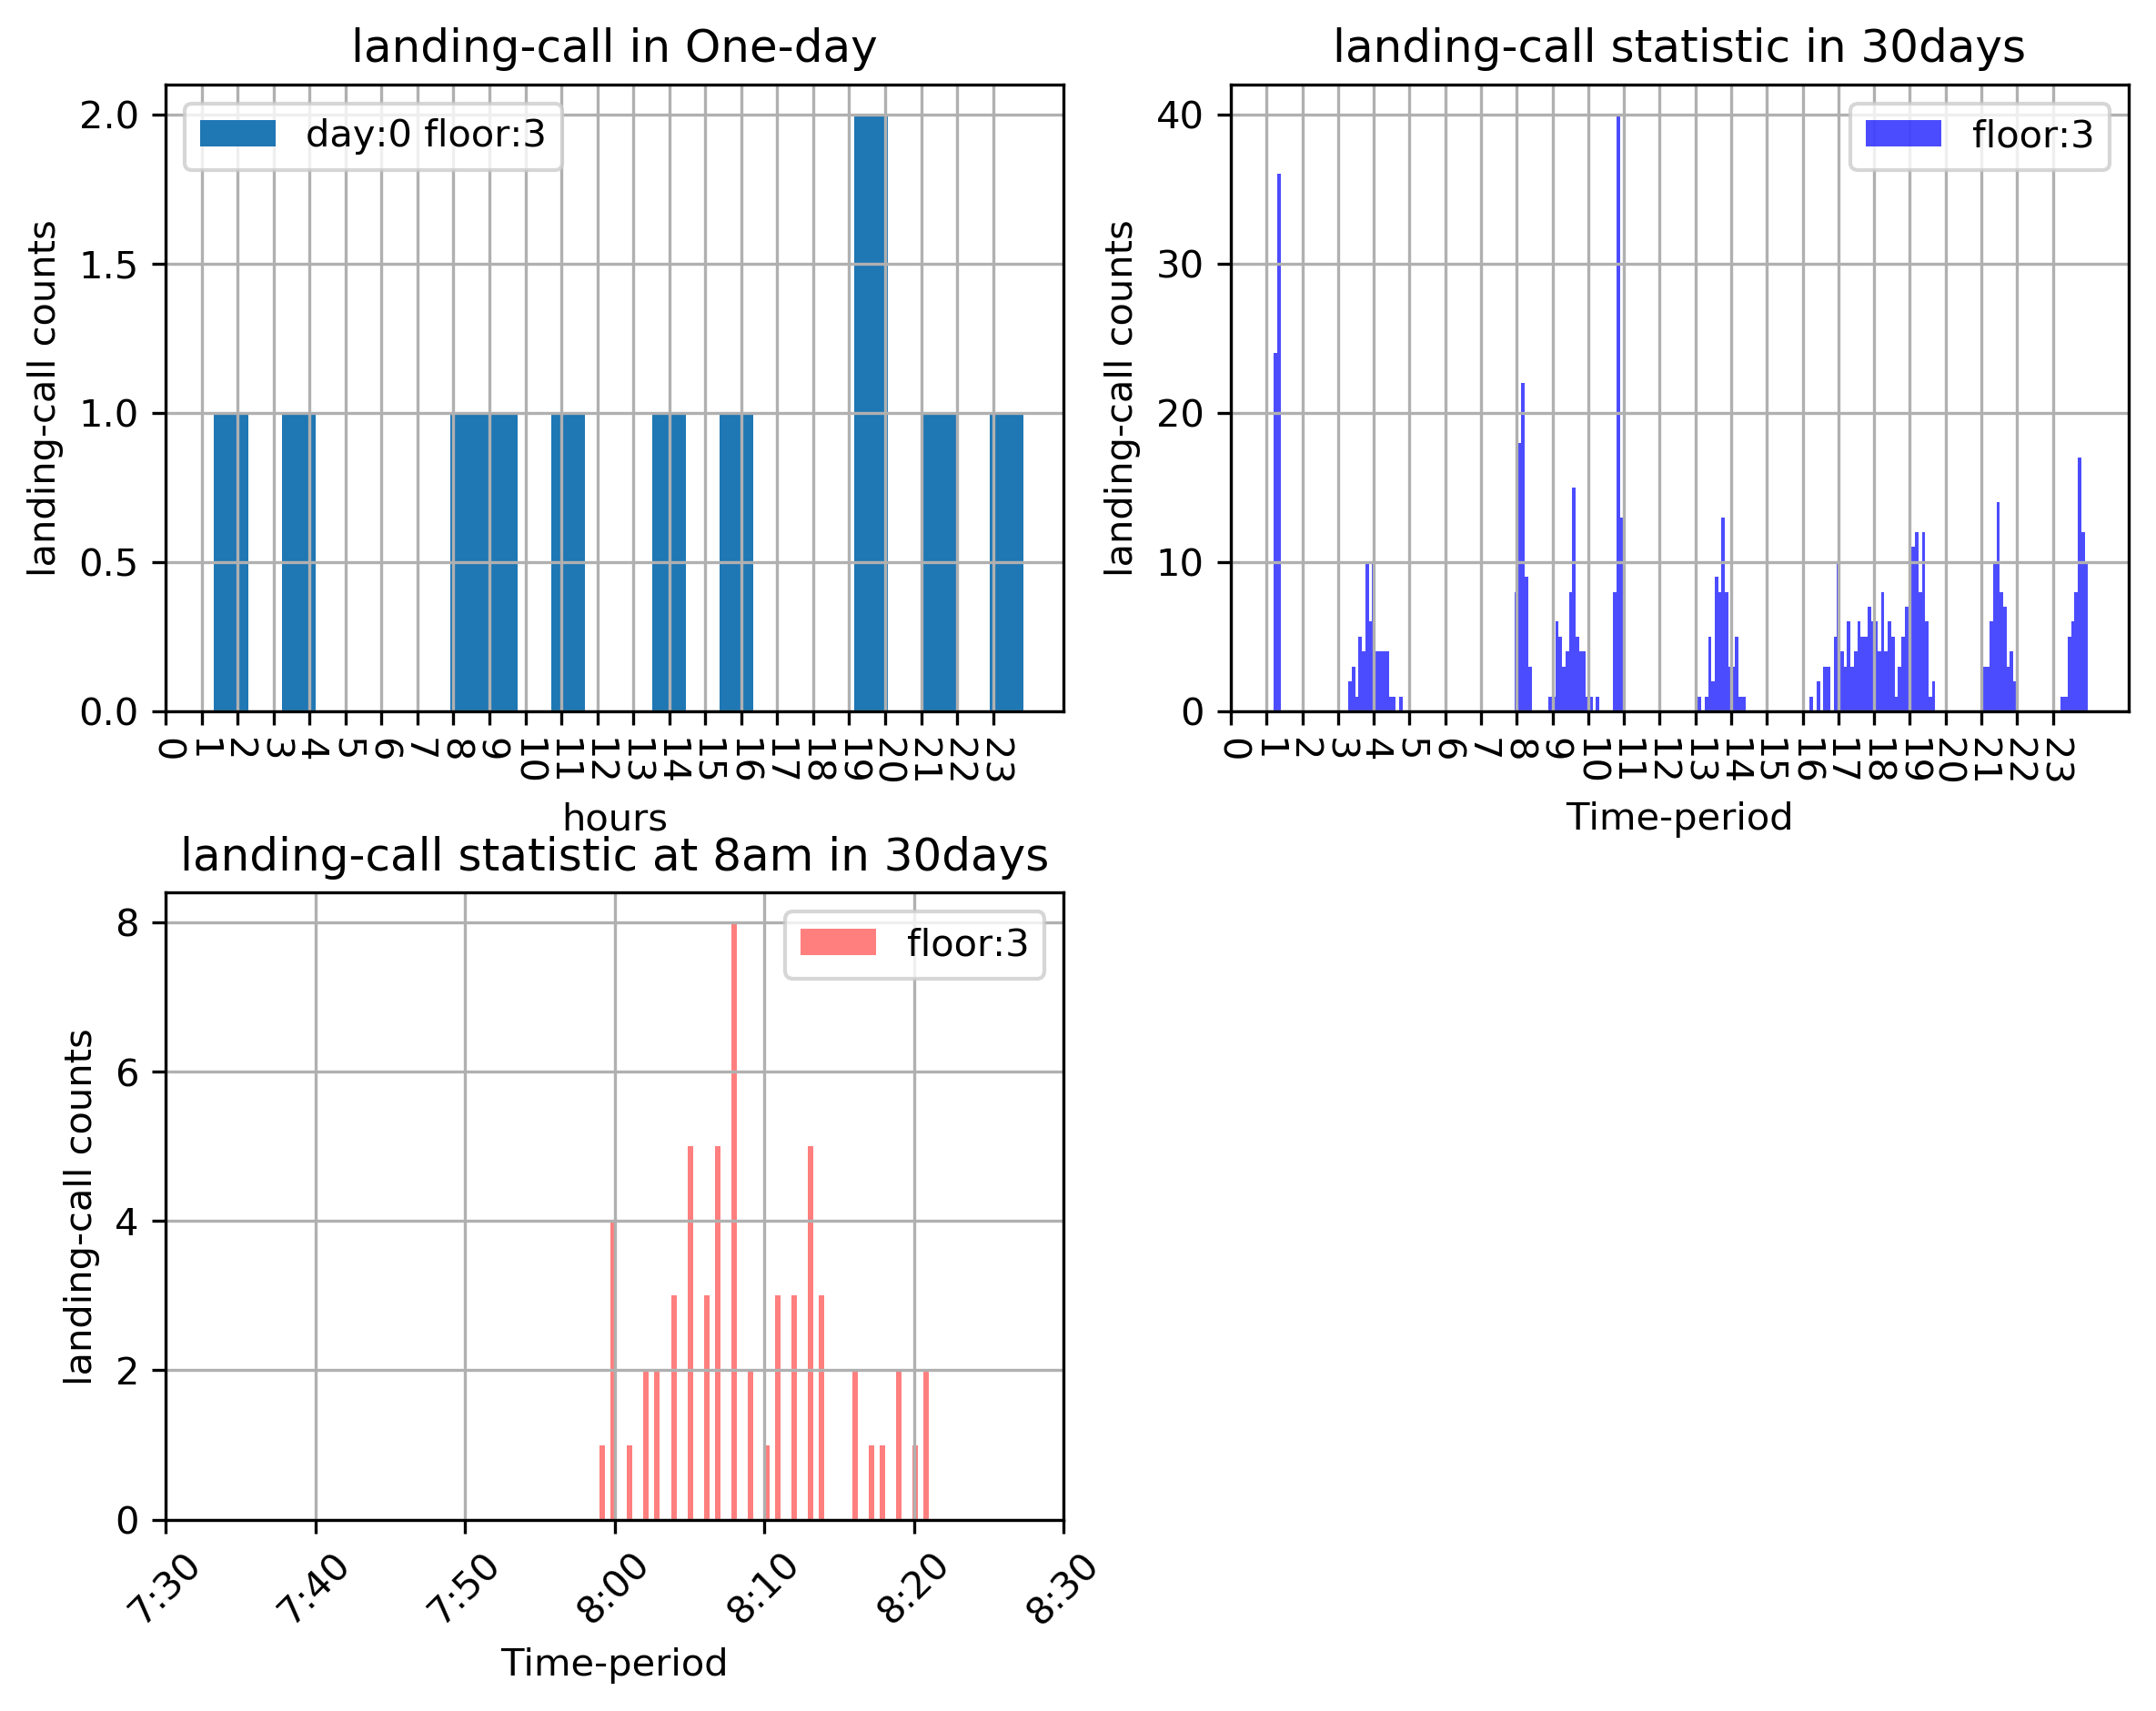

In [7]:
andrew=Person(floor=3,**{'490':5})
analyze(d=0,f=3,t=8*60)

In [ ]:
a = np.random.standard_normal((9,5))
a=a.round(6)
a

In [ ]:
#生成所有的数据
data_raw = np.random.standard_normal((30,20,1440))
data_raw=(data_raw>0).astype(np.float64)
data_raw.dtype,data_raw.shape

#生成一层楼层，一天的数据
floor2_day1=np.random.standard_normal((1440))
data_raw[0,0,:]=floor2_day1
# data_raw

In [ ]:
df_a = pd.DataFrame(a)
df_a

In [ ]:
df_a.columns=[['col1','col2','col3','col4','col5']]
df_a